# Ejercicio 04

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

## Funciones
En las siguientes celdas se desarrollan las funciones para crear las imágenes.

In [114]:
def create_image(internal_left: int, internal_right: int, external_left: int, external_right: int) -> np.array:
    """ Creates an image with two boxes with internal squares using gray scale
        @param internal_left Color of the internal pixel of the left box
        @param internal_right Color of the internal pixel of the right box
        @param external_left Color of the external pixels of the left box
        @param external_right Color of the external pixels of the right box
        @return Image numpy array
    """
    # Constant parameters used to create the image
    IMAGE_COLS = 2
    BOX_SHAPE = 3
    
    # Create the image numpy array and fill it with zeros
    image = np.zeros((BOX_SHAPE, BOX_SHAPE * IMAGE_COLS))
    for k in range(IMAGE_COLS):
        # Coordinate of the current box center
        central_coordinates = (BOX_SHAPE // 2, BOX_SHAPE // 2 + k * BOX_SHAPE)
        
        for i in range(BOX_SHAPE):
            for j in range(BOX_SHAPE):
                # Pixel coordinates
                x_coord = i
                y_coord = j + BOX_SHAPE * k
                # Pixel colors
                internal_color = internal_left * (1 - k) + internal_right * k
                external_color = external_left * (1 - k) + external_right * k
                # Draw the image pixel
                image[x_coord, y_coord] = internal_color if (x_coord, y_coord) == central_coordinates else external_color

    # Return the resulting image
    return image

In [115]:
def create_images_from_array(descriptors: list) -> list:
    """ Creates images from the descriptors given for each of them, these descriptors
        should contain the internal and external colors for the images.
        @param descriptos List of (internal_left, internal_right, external_left, external_right) colors for the image
        @return List of image numpy arrays
    """
    return [create_image(*descriptor) for descriptor in descriptors]

In [250]:
def show_experiment(title, descriptor_one, descriptor_two):
    """ Creates two images from their descriptors and plots them together side by side
        to compare the effects on the human visual system.
        @param title Title for the plot
        @param descriptor_one Descriptor of the first image
        @param descriptor_two Descriptor of the second image
    """
    # Create both images
    image_one = create_image(*descriptor_one)
    image_two = create_image(*descriptor_two)
    # Create subplot and plot the title
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(title, fontsize=18)
    # Plot the first image
    ax[0].imshow(image_one, cmap='gray', vmin=0, vmax=255)
    ax[0].axis('off')
    ax[0].set_title(f'[1° Escenario] Interior Izquierda {descriptor_one[0]} - Interior Derecha {descriptor_one[1]}', fontsize=15)
    # Plot the second image
    ax[1].imshow(image_two, cmap='gray', vmin=0, vmax=255)
    ax[1].axis('off')
    ax[1].set_title(f'[2° Escenario] Interior Izquierda {descriptor_two[0]} - Interior Derecha {descriptor_two[1]}', fontsize=15)

## Experimentos
En las siguientes celdas se prueban diferentes casos de luminancia interna y externa para ambos cuadrados, y se generan las imágenes para visualizar los efectos.

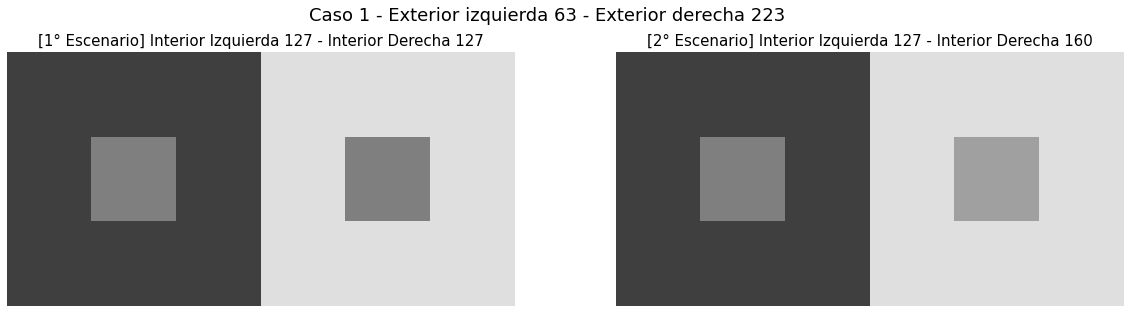

In [260]:
show_experiment('Caso 1 - Exterior izquierda 63 - Exterior derecha 223', (127, 127, 63, 223), (127, 160, 63, 223))

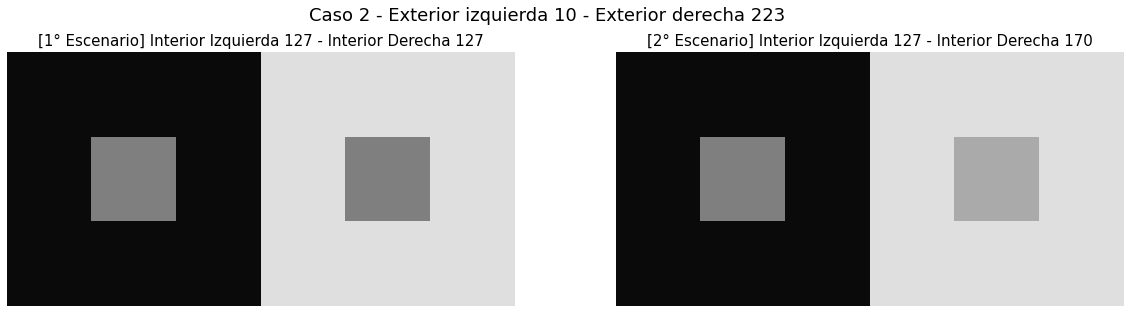

In [259]:
show_experiment('Caso 2 - Exterior izquierda 10 - Exterior derecha 223', (127, 127, 10, 223), (127, 170, 10, 223))

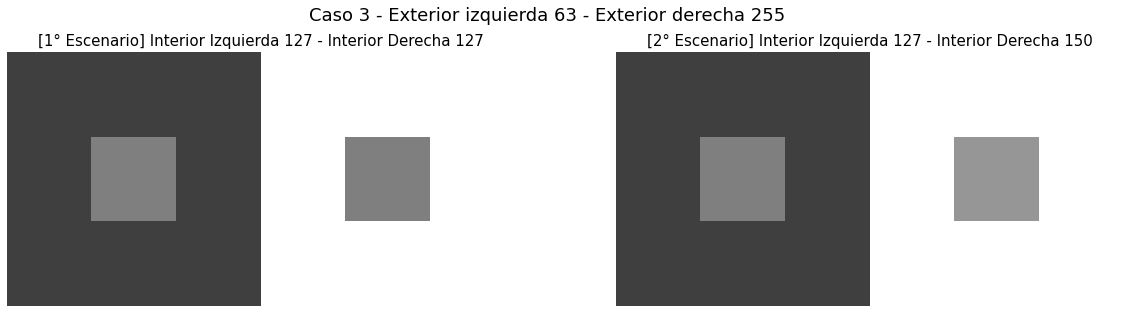

In [258]:
show_experiment('Caso 3 - Exterior izquierda 63 - Exterior derecha 255', (127, 127, 63, 255), (127, 150, 63, 255))

# Conclusiones
En general, se puede observar que por poseer diferente color de fondo, el contraste provoca que la luminancia percibida de los bloques interiores sea diferente, así es como el sistema visual del ser humano percibe que dos bloques que físicamente tienen la misma luminancia, tienen diferente intensidad. En cada experimento, se buscó modificar la luminancia interior del bloque de la derecha hasta percibirlo igual que el bloque izquierdo, de esta forma las cuando las intensidades percibidas coinciden, las intensidades física son diferentes. Además, se replicó este experimento para diferentes escenarios en los cuales el fondo de los bloques se fue cambiando para ver el efecto, y se pudo deducir que al cambiar dicho fondo luego el contraste es diferente y la luminancia física para la cual se perciben los bloques iguales también cambia. Es importante notar, que cuando el fondo de la izquierda se hace más oscuro, entonces es necesario aumentar más la luminancia del bloque de la derecha para que sean percibidos iguales, y análogamente cuando el fondo de la derecha se hace más claro, entonces es necesario
